This file is  intended to perform experiments, like visualisations...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# load  to mem times

In [2]:
memlooadfiles = glob.glob("./data/latency/latency_memload*")
uninloadfiles =  glob.glob("./data/latency/latency_unin*")

timingLoadPerMB ={
}

for filesName in memlooadfiles:
    pdframe = pd.read_csv(filesName,header=None,names=["times"])
    timingsarray  =  np.array(pdframe["times"])
    lowerb, upperbound =  np.percentile(timingsarray,[5,95])
    perclist = [x for x in timingsarray if lowerb < x <  upperbound]
    memory = int(re.sub("[^0-9]", "", filesName))
    timingLoadPerMB[memory] = np.array(perclist)


timingUninPerMB ={
}

for filesName in uninloadfiles:
    pdframe = pd.read_csv(filesName,header=None,names=["times"])
    timingsarray  =  np.array(pdframe["times"])
    lowerb, upperbound =  np.percentile(timingsarray,[5,95])
    perclist = [x for x in timingsarray if lowerb < x <  upperbound]
    memory = int(re.sub("[^0-9]", "", filesName))
    timingUninPerMB[memory] = np.array(perclist)



In [23]:
print("loads")
for  key,item in timingLoadPerMB.items():
    print(key,len(item))
print("unin")
for  key,item in timingUninPerMB.items():
    print(key,len(item))


loads
51183616 98
15204352 120
10223616 96
26214400 109
91226112 81
2228224 97
1245184 142
5242880 106
unin
51183616 162
15204352 191
2228224 165
10223616 161
5242880 176
26214400 180
1245184 241
91226112 150


In [6]:
xvalues =  [ 1,  2,  5, 10, 15, 25, 50, 90]

array([ 1,  2,  5, 10, 15, 26, 51, 91])

{'min': [3.233924, 4.183275999999999, 12.593359999999999, 19.816653, 29.082285, 59.339596, 94.094163, 149.63966100000002], 'mean': [9.300268352112676, 12.172816536082475, 32.301629594339616, 46.908506010416666, 61.570698291666666, 97.54343120183484, 135.28031047959186, 195.01451072839504], 'max': [14.810258999999999, 22.637217, 48.603359, 77.89968, 107.959468, 180.246875, 274.833027, 352.939343]}


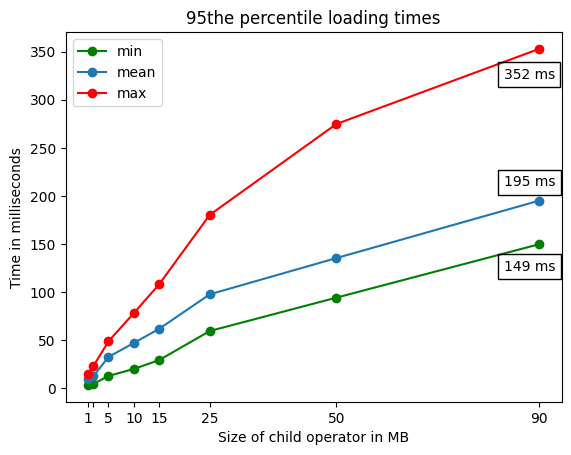

In [29]:
xvalues = []
yvalues  ={
    "min":[],
    "mean":[],
    "max":[]
}
for  key,item in sorted(timingLoadPerMB.items()):
    xvalues.append(key)
    yvalues["max"].append(np.max(item)*1000)
    yvalues["mean"].append(np.mean(item)*1000)
    yvalues["min"].append(np.min(item)*1000)

fig, ax = plt.subplots()
xvalues  =  [ 1,  2,  5, 10, 15, 25, 50, 90]
plt.title("95the percentile loading times")
plt.ylabel("Time in milliseconds")
plt.xlabel("Size of child operator in MB")
#xi = list(range(len(xvalues)))
plt.xticks(xvalues, [ "1",  "",  "5", "10", "15", "25", "50", "90"])
xi = xvalues
plt.plot(xi,yvalues["min"],label = "min", marker ='o', color = "green")
plt.plot(xi,yvalues["mean"],label = "mean", marker ='o')
plt.plot(xi,yvalues["max"],label = "max", marker ='o',color = "red")

ax.text(83, 322, str(int(yvalues["max"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(83, 210, str(int(yvalues["mean"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(83, 122, str(int(yvalues["min"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

print(yvalues)

plt.legend()
plt.show()


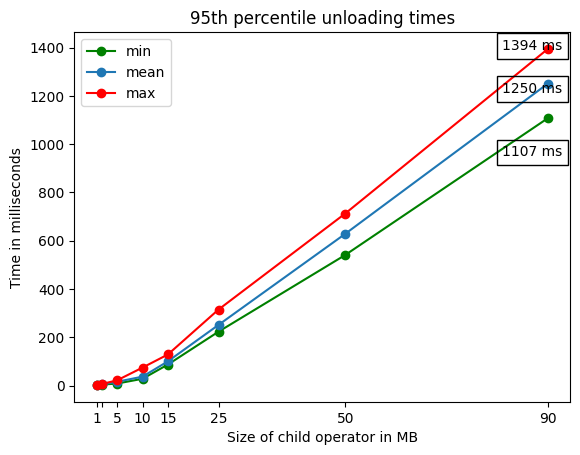

{'min': [3.2773, 4.587846, 9.093956, 28.708834, 87.731605, 223.79170200000002, 541.087858, 1107.601157], 'mean': [3.9285631452282153, 5.460813012121212, 16.460153, 37.50232511180125, 100.94715826178012, 251.85961099999997, 628.6685665864197, 1250.8370690466666], 'max': [4.860528, 7.062779, 22.588789000000002, 75.083961, 129.256374, 315.440973, 712.7510980000001, 1394.317113]}


In [30]:
xvalues = []
yvalues  ={
    "min":[],
    "mean":[],
    "max":[]
}
for  key,item in sorted(timingUninPerMB.items()):
    xvalues.append(key)
    yvalues["max"].append(np.max(item)*1000)
    yvalues["mean"].append(np.mean(item)*1000)
    yvalues["min"].append(np.min(item)*1000)


fig, ax = plt.subplots()
xvalues  =  [ 1,  2,  5, 10, 15, 25, 50, 90]
plt.xticks(xvalues, [ "1",  "",  "5", "10", "15", "25", "50", "90"])
xi = xvalues
plt.title("95th percentile unloading times")
plt.ylabel("Time in milliseconds")
plt.xlabel("Size of child operator in MB")
plt.plot(xi,yvalues["min"],label = "min", marker ='o', color = "green")
plt.plot(xi,yvalues["mean"],label = "mean", marker ='o')
plt.plot(xi,yvalues["max"],label = "max", marker ='o',color = "red")


ax.text(81, 1390, str(int(yvalues["max"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(81, 1212, str(int(yvalues["mean"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))

ax.text(81, 950, str(int(yvalues["min"][-1]))+" ms", color='black', 
        bbox=dict(facecolor='none', edgecolor='black', pad=4.0))




plt.legend()
plt.show()
print(yvalues)


# typical memory

In [9]:
df = pd.read_csv("data/typical.csv",delimiter=";")
print(df)
df = df.iloc[65:]

                           time        uss        pss
0    2023-05-09 10:02:16,765822   22499328   22499328
1    2023-05-09 10:02:16,972161   22499328   22499328
2    2023-05-09 10:02:17,184481   22499328   22499328
3    2023-05-09 10:02:17,394923  115195904  115195904
4    2023-05-09 10:02:17,604933  115195904  115195904
..                          ...        ...        ...
132  2023-05-09 10:02:46,204214   22515712   22515712
133  2023-05-09 10:02:46,428615   22515712   22515712
134  2023-05-09 10:02:46,653562   22515712   22515712
135  2023-05-09 10:02:46,881236   22515712   22515712
136  2023-05-09 10:02:47,106305   22515712   22515712

[137 rows x 3 columns]


/tmp/ipykernel_21847/4254096826.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


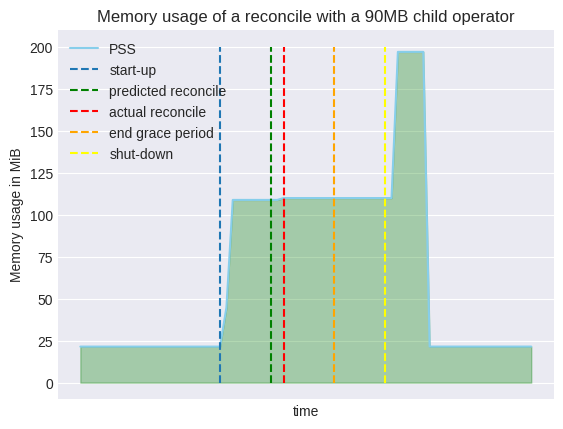

In [11]:
# create data
x=range(len(df))
y=df['pss']/1_048_576

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Make the same graph
plt.fill_between( x, y, color="green", alpha=0.3)
plt.plot(x, y, color="skyblue",label="PSS")
 
# Add titles

plt.vlines(x=22, ymin=0, ymax=200,linestyles='dashed',label="start-up")
plt.vlines(x=30, ymin=0, ymax=200,colors='green',linestyles='dashed',label="predicted reconcile")
plt.vlines(x=32, ymin=0, ymax=200,colors='red',linestyles='dashed',label="actual reconcile")
plt.vlines(x=40, ymin=0, ymax=200,colors='orange',linestyles='dashed',label="end grace period")
plt.vlines(x=48, ymin=0, ymax=200,colors='yellow',linestyles='dashed',label="shut-down")


plt.title("Memory usage of a reconcile with a 90MB child operator")
plt.ylabel("Memory usage in MiB")
plt.xlabel("time")
plt.legend()
plt.xticks([])
# Show the graph
plt.show()

# Latency timings

In [7]:
reconciletimes = pd.read_csv("data/latency_e2e/reconciletimings.csv",header=None,names=["time"],parse_dates=[0])

In [8]:
changetimes = pd.read_csv("data/latency_e2e/changetimingsfixed.csv",header=None,names=["time"],parse_dates=[0])

In [11]:
differences = reconciletimes["time"] - changetimes["time"]

In [16]:
differences = [x.total_seconds() * 1000 for x in differences]

In [17]:
np.mean(differences)

204.7682252747253

In [19]:
print(np.sort(differences))

[   5.042    5.309    5.397    5.428    5.689    6.138    7.247    7.895
   13.133   13.415   13.534   14.033   14.117   14.324   14.435   14.576
   14.66    14.681   14.697   14.704   14.769   14.793   14.804   14.907
   14.949   14.985   14.99    15.084   15.126   15.164   15.257   15.27
   15.362   15.38    15.409   15.428   15.438   15.461   15.586   15.62
   15.62    15.623   15.639   15.644   15.649   15.666   15.678   15.7
   15.72    15.73    15.76    15.773   15.791   15.799   15.8     15.802
   15.808   15.815   15.83    15.838   15.862   15.88    15.897   15.922
   15.928   15.948   15.997   16.003   16.022   16.034   16.045   16.054
   16.062   16.078   16.079   16.086   16.099   16.112   16.12    16.13
   16.155   16.164   16.198   16.248   16.277   16.319   16.36    16.379
   16.381   16.424   16.437   16.463   16.468   16.48    16.486   16.522
   16.532   16.533   16.539   16.549   16.557   16.72    16.722   16.824
   16.838   16.867   16.88    16.917   16.94    16.979  

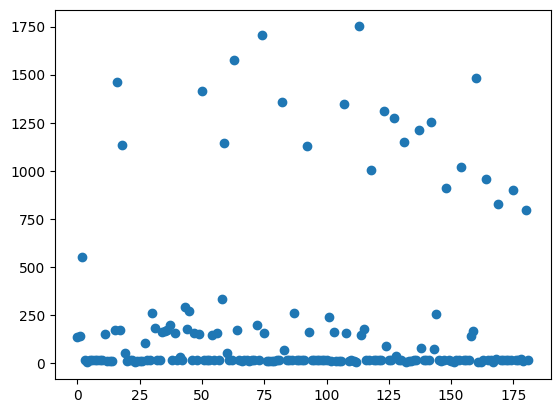

In [21]:
plt.scatter(range(len(differences)),differences)
plt.show()